In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import yfinance as yf
from semopy import Model
from semopy import Optimizer
from semopy.inspector import inspect

In [ ]:
model_desc = """
    # Latent Variables:
    #Economic_Awareness =~ public_media + private_media + messengers + social_media + video_platforms
    
    #Investment_Behavior =~ willingness_invest + sensitivity_invest_stock + trust_stock_market
    Investment_Behavior = F71invest + F3A21_1 + F5A10_2
    
    #Financial_Situation =~ inflation_rate + interest_rate + dax_points + consumer_price_index
    
    # Regression:
    Investment_Behavior~ Economic_Awareness + Financial_Situation
"""

/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/tools/preprocessing_data.py:10: DtypeWarning: Columns (55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,74,75,148,161,166) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("../Data/data_sample_700_SOSEC_dataset_germany.csv")
[*********************100%***********************]  1 of 1 completed


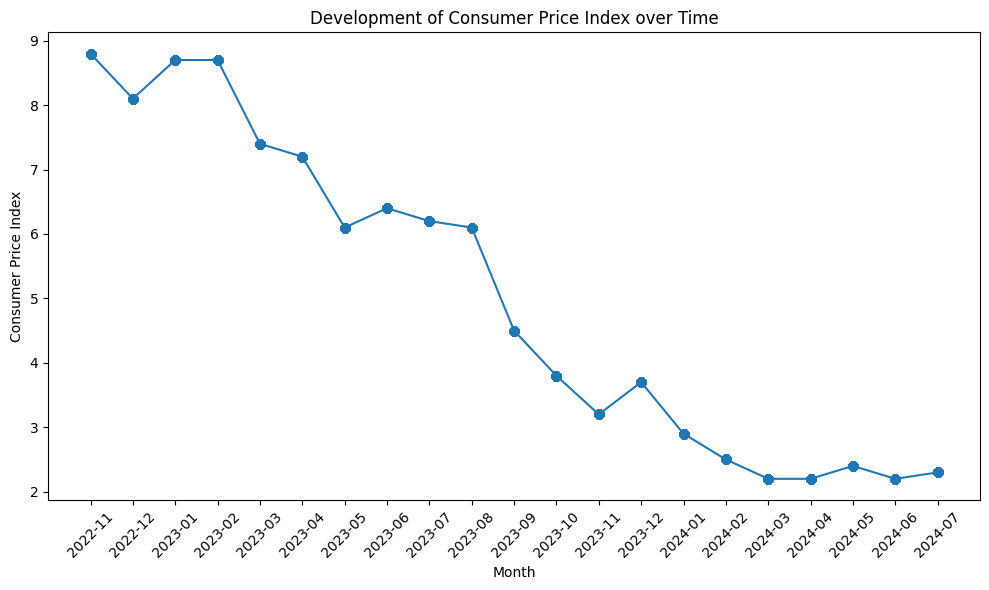

In [23]:
from tools.preprocessing_data import load_data
from tools.add_finance_data import add_finance_data
import os

data = load_data()
df_finance = add_finance_data(data)

import matplotlib.pyplot as plt
output_dir = '/Users/inagege/Documents/00_Uni/SeminarSocialSentimentInTimesOfCrisis/results/financial_indices_over_time'

# Ensure 'i_START' is in datetime format
df_finance['i_START'] = pd.to_datetime(df_finance['i_START'])

# Extract the month from 'i_START' and convert to string
df_finance['Month'] = df_finance['i_START'].dt.to_period('M').astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_finance['Month'], df_finance['consumer_price_index'], marker='o')
plt.title('Development of Consumer Price Index over Time')
plt.xlabel('Month')
plt.ylabel('Consumer Price Index')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot
output_path = os.path.join(output_dir, 'consumer_price_index.png')
plt.savefig(output_path)

# Show the plot
plt.show()